In [1]:
import findspark

In [2]:
findspark.init('/home/farid/spark/')

In [3]:
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import StandardScaler


In [4]:
import numpy as np
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline
import matplotlib.pyplot as plt


In [5]:

from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [6]:
spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config('spark.driver.host','127.0.0.1') \
    .getOrCreate()


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/04/23 15:57:54 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [7]:
df=spark.read.csv('ML_hw_dataset.csv',header=True,inferSchema=True)


In [8]:
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day_of_week: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- emp_var_rate: double (nullable = true)
 |-- cons_price_idx: double (nullable = true)
 |-- cons_conf_idx: double (nullable = true)
 |-- euribor3m: double (nullable = true)
 |-- nr_employed: double (nullable = true)
 |-- y: integer (nullable = true)



In [9]:
shape = (df.count(),len(df.columns))
shape

(41188, 21)

In [10]:
for i in df.columns:
    print(df.filter(df[i].isNull()).count())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [11]:
job_indexer = StringIndexer(inputCol="job", outputCol="jobIndex")
marital_indexer = StringIndexer(inputCol="marital", outputCol="maritalIndex")
education_indexer = StringIndexer(inputCol="education", outputCol="educationIndex")
housing_indexer = StringIndexer(inputCol="housing", outputCol="housingIndex")
loan_indexer = StringIndexer(inputCol="loan", outputCol="loanIndex")
contact_indexer = StringIndexer(inputCol="contact", outputCol="contactIndex")
poutcome = StringIndexer(inputCol="poutcome", outputCol="poutcomeIndex")
default = StringIndexer(inputCol="default", outputCol="defaultIndex")
month = StringIndexer(inputCol="month", outputCol="monthIndex")
day_of_week =StringIndexer(inputCol="day_of_week", outputCol="day_of_weekIndex")
pipeline = Pipeline(stages=[job_indexer, marital_indexer,education_indexer,housing_indexer,loan_indexer,contact_indexer,poutcome,default,month,day_of_week])
model = pipeline.fit(df).transform(df)
model.head(1)

23/04/23 15:58:20 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


[Row(age=44, job='blue-collar', marital='married', education='basic.4y', default='unknown', housing='yes', loan='no', contact='cellular', month='aug', day_of_week='thu', duration=210, campaign=1, pdays=999, previous=0, poutcome='nonexistent', emp_var_rate=1.4, cons_price_idx=93.444, cons_conf_idx=-36.1, euribor3m=4.963, nr_employed=5228.1, y=0, jobIndex=1.0, maritalIndex=0.0, educationIndex=4.0, housingIndex=0.0, loanIndex=0.0, contactIndex=0.0, poutcomeIndex=0.0, defaultIndex=1.0, monthIndex=2.0, day_of_weekIndex=0.0)]

In [12]:
df2=model.select('age','duration','campaign','pdays','previous','emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed','jobIndex','maritalIndex','educationIndex','housingIndex','loanIndex','contactIndex','poutcomeIndex','defaultIndex','monthIndex','day_of_weekIndex','y')

In [13]:
df2.head(1)[0]

Row(age=44, duration=210, campaign=1, pdays=999, previous=0, emp_var_rate=1.4, cons_price_idx=93.444, cons_conf_idx=-36.1, euribor3m=4.963, nr_employed=5228.1, jobIndex=1.0, maritalIndex=0.0, educationIndex=4.0, housingIndex=0.0, loanIndex=0.0, contactIndex=0.0, poutcomeIndex=0.0, defaultIndex=1.0, monthIndex=2.0, day_of_weekIndex=0.0, y=0)

In [14]:
len(df2.columns)

21

In [15]:
assemble1 = VectorAssembler(inputCols=df2.columns[:20],outputCol='features')

In [16]:
output1=assemble1.transform(df2)

In [17]:
svm1=output1.select(['y','features'])

In [18]:
svm1.show()

+---+--------------------+
|  y|            features|
+---+--------------------+
|  0|[44.0,210.0,1.0,9...|
|  0|[53.0,138.0,1.0,9...|
|  1|[28.0,339.0,3.0,6...|
|  0|[39.0,185.0,2.0,9...|
|  1|[55.0,137.0,1.0,3...|
|  0|[30.0,68.0,8.0,99...|
|  0|(20,[0,1,2,3,5,6,...|
|  0|[39.0,191.0,1.0,9...|
|  1|[36.0,174.0,1.0,3...|
|  0|[27.0,191.0,2.0,9...|
|  0|[34.0,62.0,2.0,99...|
|  0|(20,[0,1,2,3,5,6,...|
|  1|[55.0,372.0,3.0,9...|
|  0|[33.0,75.0,5.0,99...|
|  0|[26.0,1021.0,1.0,...|
|  0|[52.0,117.0,2.0,9...|
|  1|[35.0,1034.0,2.0,...|
|  1|[27.0,540.0,1.0,9...|
|  0|[28.0,140.0,1.0,9...|
|  0|[26.0,104.0,4.0,9...|
+---+--------------------+
only showing top 20 rows



In [19]:
train1,test1 = svm1.randomSplit([0.8,0.2])

In [20]:
lsvc = LinearSVC(labelCol="y", maxIter=50)
lsvc = lsvc.fit(train1)

In [21]:
test_result = lsvc.evaluate(test1)
test_result.accuracy

0.9021281712155825

In [22]:
test_result.precisionByLabel

[0.917832612566777, 0.6307692307692307]

In [23]:
test_result.recallByLabel

[0.9772481040086674, 0.30760986066452306]

In [24]:
c=df2.columns

In [25]:
cor=[]
cor

[]

In [26]:
for i in range(len(c)):
    for j in range(i+1,len(c)):
        if df2.corr(c[i],c[j]) > 0.5 or df2.corr(c[i],c[j])< -0.5:
            cor.append([c[i],c[j],df2.corr(c[i],c[j])])
        

In [27]:
cor

[['pdays', 'previous', -0.5875138561368254],
 ['pdays', 'poutcomeIndex', -0.7446794092966299],
 ['previous', 'nr_employed', -0.5013329290363082],
 ['previous', 'poutcomeIndex', 0.8685396269499197],
 ['emp_var_rate', 'cons_price_idx', 0.7753341708350099],
 ['emp_var_rate', 'euribor3m', 0.9722446711516083],
 ['emp_var_rate', 'nr_employed', 0.9069701012560633],
 ['cons_price_idx', 'euribor3m', 0.6882301070376754],
 ['cons_price_idx', 'nr_employed', 0.5220339770133019],
 ['cons_price_idx', 'contactIndex', 0.591473618646372],
 ['euribor3m', 'nr_employed', 0.9451544313982735],
 ['nr_employed', 'poutcomeIndex', -0.5095971043392643]]

In [28]:
dele=['pdays','previous','emp_var_rate','cons_price_idx','defaultIndex','monthIndex','day_of_weekIndex']

In [29]:
dataframe = df2.drop(*dele)
dataframe.head(6)[0]

Row(age=44, duration=210, campaign=1, cons_conf_idx=-36.1, euribor3m=4.963, nr_employed=5228.1, jobIndex=1.0, maritalIndex=0.0, educationIndex=4.0, housingIndex=0.0, loanIndex=0.0, contactIndex=0.0, poutcomeIndex=0.0, y=0)

In [30]:
dataframe.printSchema()

root
 |-- age: integer (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- cons_conf_idx: double (nullable = true)
 |-- euribor3m: double (nullable = true)
 |-- nr_employed: double (nullable = true)
 |-- jobIndex: double (nullable = false)
 |-- maritalIndex: double (nullable = false)
 |-- educationIndex: double (nullable = false)
 |-- housingIndex: double (nullable = false)
 |-- loanIndex: double (nullable = false)
 |-- contactIndex: double (nullable = false)
 |-- poutcomeIndex: double (nullable = false)
 |-- y: integer (nullable = true)



In [31]:
dataframe.columns[:13]

['age',
 'duration',
 'campaign',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'jobIndex',
 'maritalIndex',
 'educationIndex',
 'housingIndex',
 'loanIndex',
 'contactIndex',
 'poutcomeIndex']

In [32]:
distinctDF = dataframe.distinct()
print("Distinct count: "+str(distinctDF.count()))
distinctDF.show(truncate=False)

Distinct count: 41172
+---+--------+--------+-------------+---------+-----------+--------+------------+--------------+------------+---------+------------+-------------+---+
|age|duration|campaign|cons_conf_idx|euribor3m|nr_employed|jobIndex|maritalIndex|educationIndex|housingIndex|loanIndex|contactIndex|poutcomeIndex|y  |
+---+--------+--------+-------------+---------+-----------+--------+------------+--------------+------------+---------+------------+-------------+---+
|48 |132     |1       |-47.1        |1.365    |5099.1     |2.0     |2.0         |0.0           |0.0         |0.0      |0.0         |0.0          |0  |
|40 |156     |1       |-36.1        |4.968    |5228.1     |2.0     |0.0         |3.0           |1.0         |0.0      |0.0         |0.0          |0  |
|25 |71      |1       |-41.8        |4.961    |5228.1     |1.0     |0.0         |2.0           |1.0         |0.0      |1.0         |0.0          |0  |
|25 |959     |3       |-46.2        |1.266    |5099.1     |10.0    |1.0 

In [33]:
psdf = dataframe.toPandas()
type(psdf)

pandas.core.frame.DataFrame

In [34]:
len(psdf.columns)

14

<AxesSubplot:>

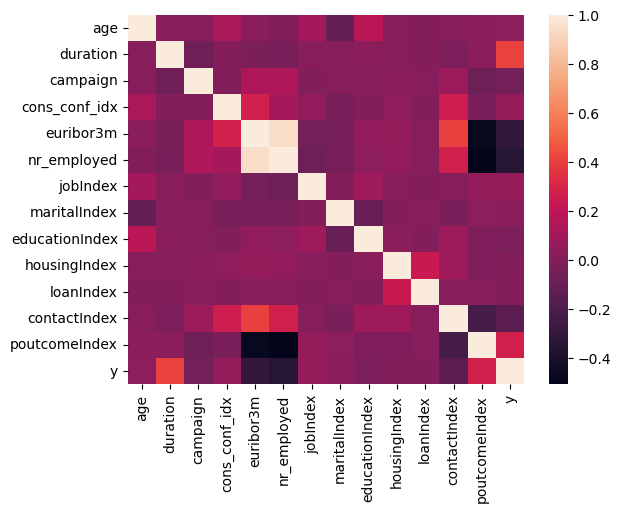

In [35]:
from seaborn import heatmap
heatmap(psdf.corr())

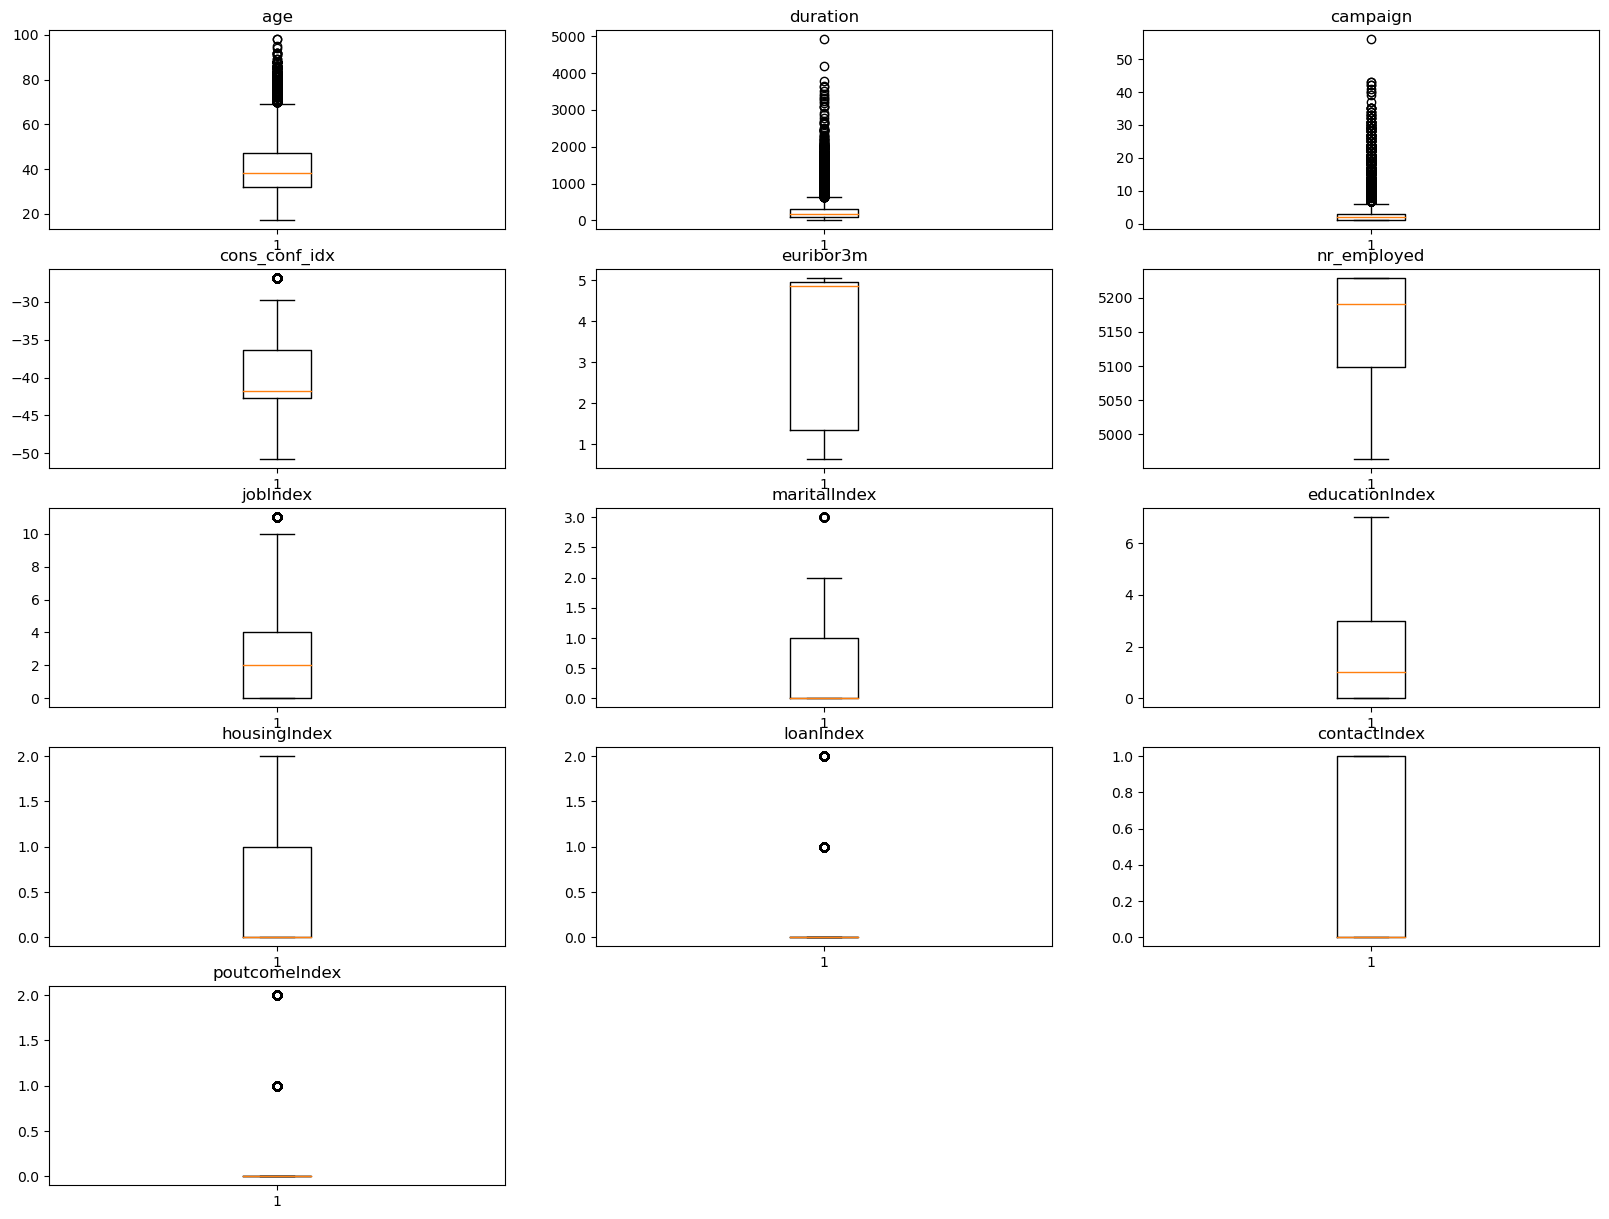

In [36]:
fig = plt.figure(figsize =(20, 15))
for i in range(len(psdf.columns)-1):
    plt.subplot(5, 3, i+1)
    plt.boxplot(psdf[psdf.columns[i]])
    plt.title(psdf.columns[i])
plt.show()

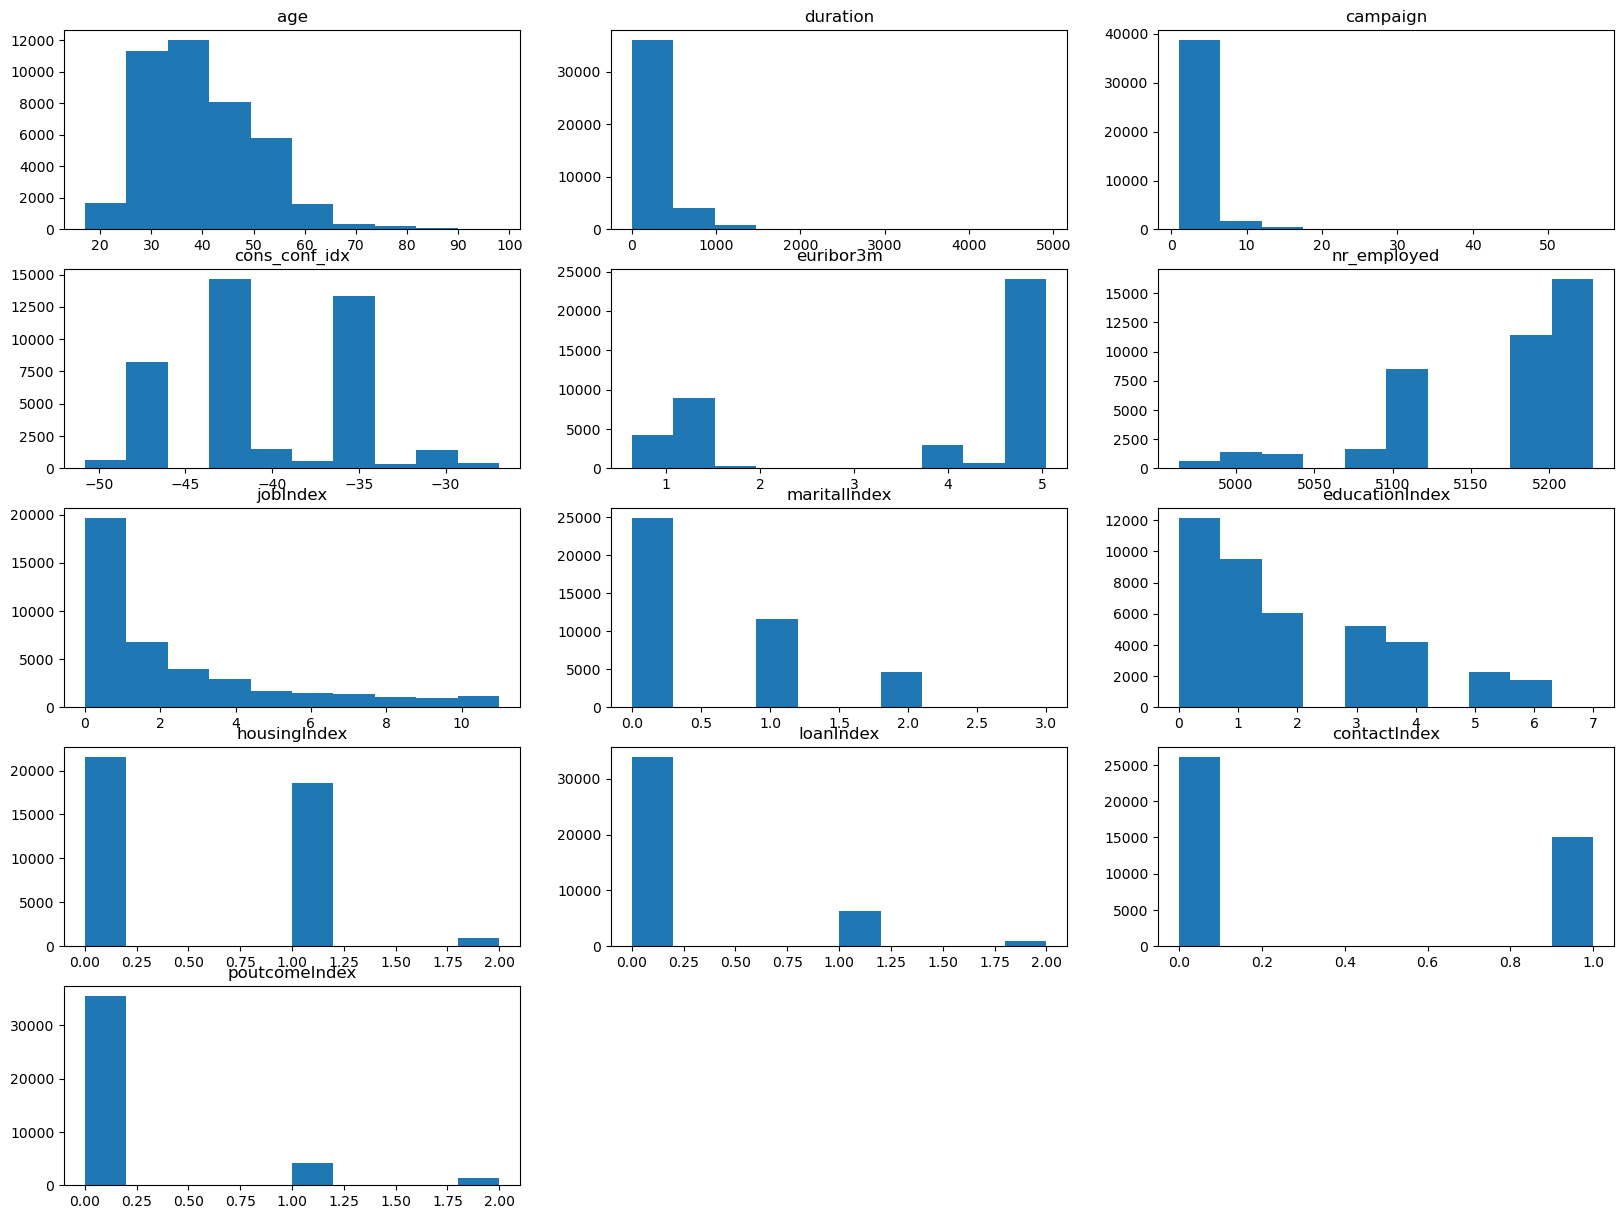

In [37]:
fig = plt.figure(figsize =(20, 15))
for i in range(len(psdf.columns)-1):
    plt.subplot(5, 3, i+1)
    plt.hist(psdf[psdf.columns[i]])
    plt.title(psdf.columns[i])
plt.show()

In [38]:
assemble2 = VectorAssembler(inputCols=dataframe.columns[:13],outputCol='features')

In [39]:
output2=assemble2.transform(dataframe)

In [40]:
svm2=output2.select(['y','features'])

In [41]:
standardScaler = StandardScaler().setInputCol('features').setOutputCol('features1')


In [42]:
mode=standardScaler.fit(svm2)

In [43]:
scaler_df = mode.transform(svm2)
scaler_df.show()

+---+--------------------+--------------------+
|  y|            features|           features1|
+---+--------------------+--------------------+
|  0|[44.0,210.0,1.0,-...|[4.22214226513125...|
|  0|[53.0,138.0,1.0,-...|[5.08576227390809...|
|  1|[28.0,339.0,3.0,-...|[2.68681780508352...|
|  0|[39.0,185.0,2.0,-...|[3.74235337136633...|
|  1|[55.0,137.0,1.0,-...|[5.27767783141406...|
|  0|[30.0,68.0,8.0,-4...|[2.87873336258948...|
|  0|[37.0,204.0,1.0,-...|[3.55043781386036...|
|  0|[39.0,191.0,1.0,-...|[3.74235337136633...|
|  1|[36.0,174.0,1.0,-...|[3.45448003510738...|
|  0|[27.0,191.0,2.0,-...|[2.59086002633054...|
|  0|[34.0,62.0,2.0,-3...|[3.26256447760142...|
|  0|(13,[0,1,2,3,4,5,...|(13,[0,1,2,3,4,5,...|
|  1|[55.0,372.0,3.0,-...|[5.27767783141406...|
|  0|[33.0,75.0,5.0,-4...|[3.16660669884843...|
|  0|[26.0,1021.0,1.0,...|[2.49490224757755...|
|  0|[52.0,117.0,2.0,-...|[4.98980449515511...|
|  1|[35.0,1034.0,2.0,...|[3.35852225635440...|
|  1|[27.0,540.0,1.0,-...|[2.59086002633

In [44]:
train2,test2 = scaler_df.randomSplit([0.8,0.2])

In [45]:
lsvc1 = LinearSVC(labelCol="y", maxIter=50,featuresCol='features1')
lsvc1 = lsvc1.fit(train2)

In [51]:
test_result2 = lsvc1.evaluate(test2)

In [52]:
test_result2.accuracy

0.904629852905715

In [48]:
test_result2.precisionByLabel

[0.915948275862069, 0.6847290640394089]

In [49]:
test_result2.recallByLabel

[0.9825921392628859, 0.29543039319872477]

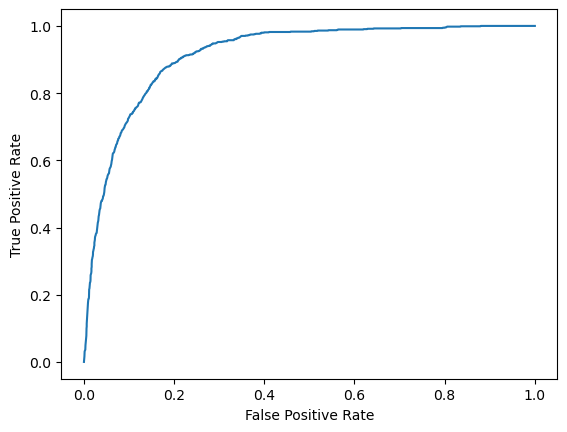

In [50]:
plt.plot(test_result2.roc.toPandas()['FPR'],test_result2.roc.toPandas()['TPR'])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()